In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:\Python HW\Assignment\Titani  data analysis\Titanic_Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [6]:
survived = df['PassengerId'].groupby([df['Pclass'], df['Survived'], df['Sex']]).count()

In [7]:
survived

Pclass  Survived  Sex   
1       0         female      3
                  male      134
        1         female    141
                  male       45
2       0         female      6
                  male      154
        1         female    100
                  male       17
3       0         female     72
                  male      446
        1         female    144
                  male       47
Name: PassengerId, dtype: int64

In [8]:
survived_ = survived.unstack()

In [9]:
survived_

Sex              female  male
Pclass Survived              
1      0              3   134
       1            141    45
2      0              6   154
       1            100    17
3      0             72   446
       1            144    47

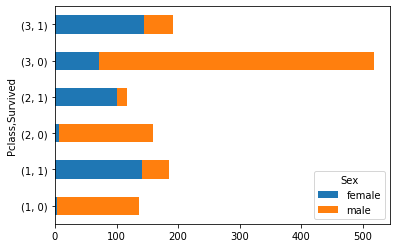

In [10]:
survived_.plot(kind = 'barh', stacked = True)
plt.show()

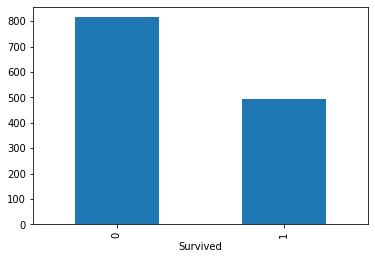

In [11]:
df['PassengerId'].groupby([df['Survived']]).count().plot(kind = 'bar')

In [12]:
children = pd.Series(list(np.argwhere(df['Age'] <= 15)))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [13]:
Childs = children.groupby([df['Survived'], df['Pclass']]).count()

In [14]:
Childs.unstack()

Pclass,1,2,3
Survived,,,
0,13,6,52
1,10,12,22


In [15]:
Teens = pd.Series(list(np.argwhere(df['Age'].isin(range(16, 18)))))

In [16]:
Teens_ = Teens.groupby([df['Survived'], df['Pclass']]).count()

In [17]:
Teens_.unstack()

Pclass,1,2,3
Survived,,,
0,5,2,14
1,5,4,9


In [18]:
Adults = pd.Series(list(np.argwhere(df['Age'] >= 18)))

In [19]:
Adults_ = Adults.groupby([df['Survived'],df['Pclass']]).count()

In [20]:
Adults_.unstack()

Pclass,1,2,3
Survived,,,
0,80,97,373
1,136,87,119


In [21]:
df_age = pd.DataFrame({'Childs':Childs,'Teens':Teens_, 'Adults':Adults_
                       
             })

In [22]:
df_age

Childs  Teens  Adults
Survived Pclass                       
0        1           13      5      80
         2            6      2      97
         3           52     14     373
1        1           10      5     136
         2           12      4      87
         3           22      9     119

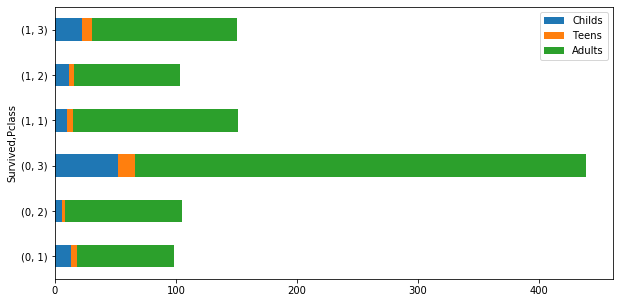

In [23]:
df_age.plot(kind = 'barh', stacked = True, figsize = (10, 5))
plt.show()

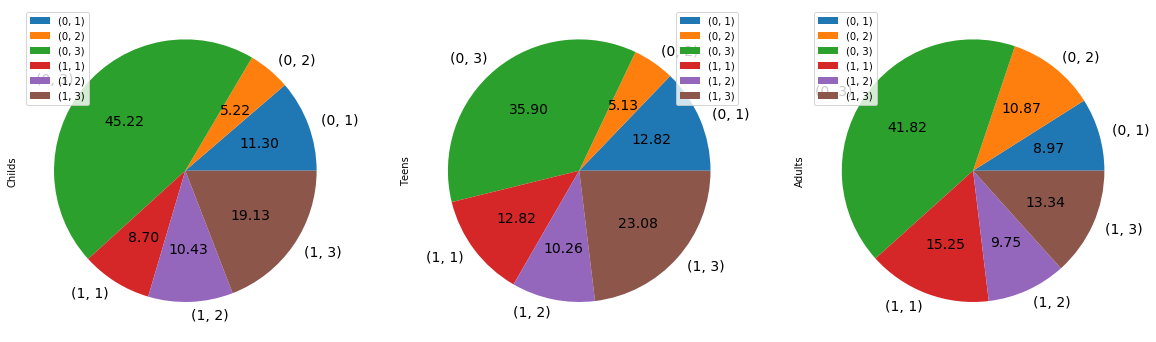

In [24]:
df_age.plot(kind = 'pie', subplots = True, autopct = '%.2f', figsize = (20, 20), fontsize = 14)
plt.show()

In [25]:
mean_age = df['Age'].mean()

In [26]:
df_= df['Age'].fillna(mean_age)

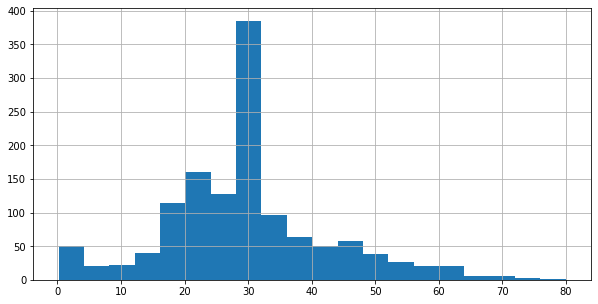

In [27]:
df_.hist(bins = 20, figsize = (10, 5))
plt.show()